<a href="https://colab.research.google.com/github/Barryjuait/Barryjuait/blob/master/Personal%20Projects/Estimating_Prices_in_Boston_with_Supervised_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning Models 1**


## <font color='blue'>**Boston Housing Dataset**</font>

The objective is to predict, at a business level, the average value of a property in thousands of dollars in Boston (corresponding to the variable **MEDV**)

Information of the attributes:  
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per \$10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    \% lower status of the population
14. MEDV     Median value of owner-occupied homes in \$1000's (target)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from matplotlib import style, offsetbox
import matplotlib.cm as cm
style.use('ggplot') or plt.style.use('ggplot')

from sklearn import preprocessing, linear_model
from sklearn.ensemble import BaggingClassifier, GradientBoostingRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, silhouette_score, confusion_matrix, f1_score, classification_report, accuracy_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, scale
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors, metrics)
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.feature_selection import (f_classif, VarianceThreshold, chi2, mutual_info_classif, SelectKBest,
                                       SelectPercentile)
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, Lasso 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram

from ipywidgets import interact, widgets

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load the data:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names=['CRIM','ZN','INDUS','CHAS','NOS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv(url,delimiter='\s+', header=None, names=names)

df.head(5)

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Number of properties:
print(f'{df.shape[0]}')

506


In [ ]:
#Type of variables available:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOS        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
#Sumamry Table:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The data contains information about 506 properties and all the variables are numeric.


In [ ]:
#Null data:
df.isna().sum();

In [ ]:
#Drop Duplicate data:
df.drop_duplicates();

In [ ]:
#We make a backup copy first:
df1=df.copy()

##Descriptive Analysis:

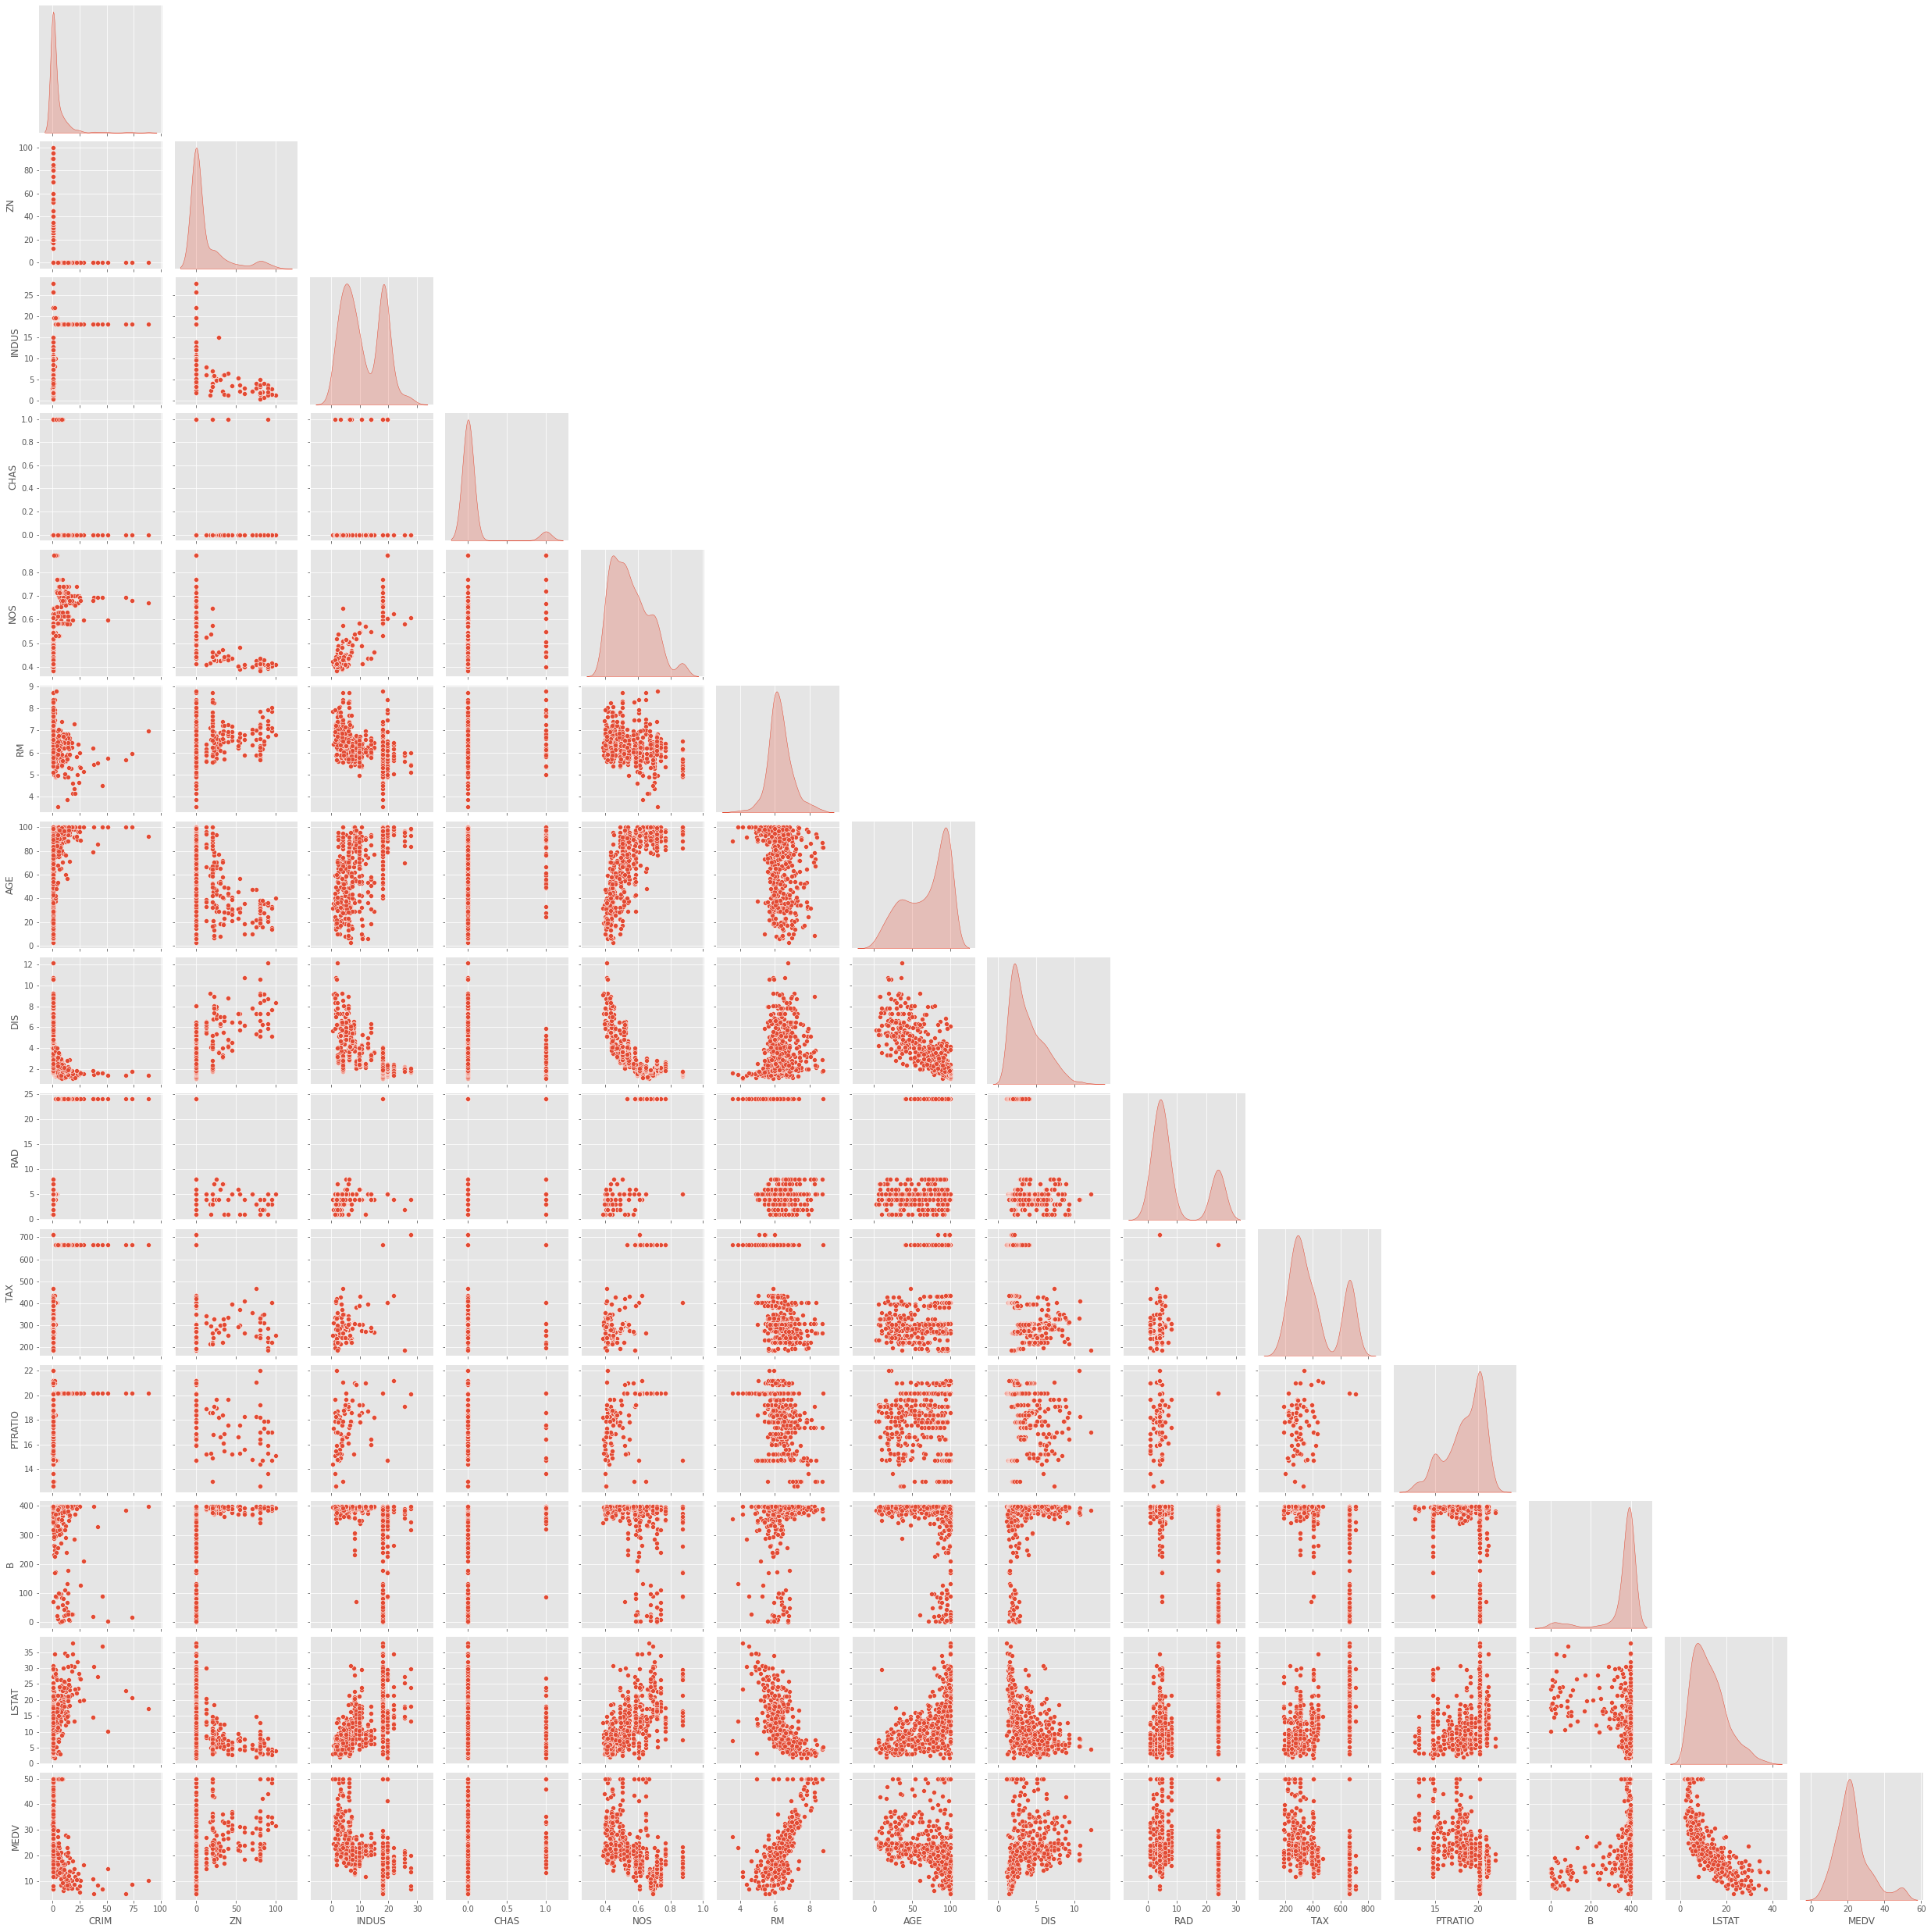

In [ ]:
#Describe all the possible interactions between the features:
g = sns.pairplot(data = df, corner = True, diag_kind='kde', dropna=True);

It appears that some features can discribe at least 2 clusters when interacting with other ones, however 3 clusters seem unlikely

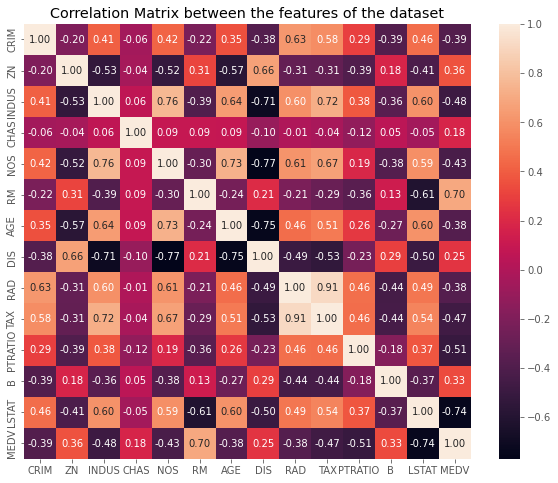

In [ ]:
#Correlacion matrix

fig, ax = plt.subplots(1,1, figsize = (10,8));

c_matrix = pd.DataFrame.corr(df.astype('float'))
sns.heatmap(c_matrix, annot=True, fmt='.2f', ax = ax);
ax.set_title('Correlation Matrix between the features of the dataset')

plt.show()

Since we do not count with labeled data, we need to figure out a way to find clusters. Due to the large amount of features, we will use dimensionality reduction using a PCA:

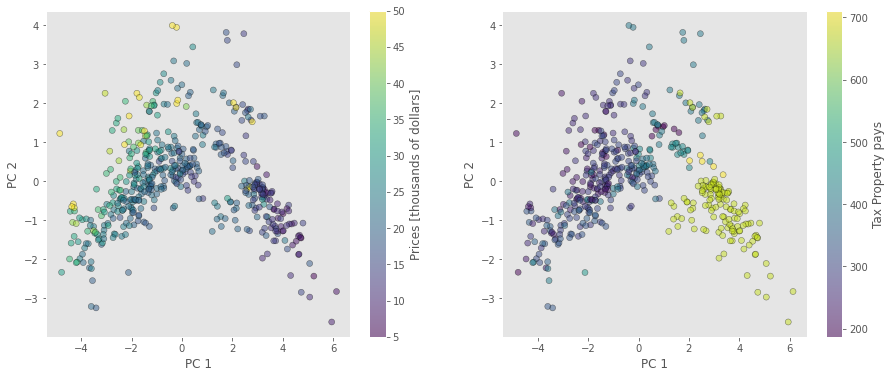

In [ ]:
#PCA

y = df.MEDV;
X = df.drop("MEDV", axis=1);
features_names = list(X.columns);
X = np.array(X); 

# We normalize the data:
X = StandardScaler().fit_transform(X)

#PCA
pca = PCA(2)  # We project only 2 dimensions
projected = pca.fit_transform(X)

fig, ax = plt.subplots(1,2,figsize=(15,6))
im = ax[0].scatter(projected[:, 0], projected[:, 1], c=df.MEDV, edgecolor='black', alpha=0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[0].grid()
fig.colorbar(im, ax=ax[0], label = 'Prices [thousands of dollars]')

im = ax[1].scatter(projected[:, 0], projected[:, 1], c=df.TAX, edgecolor='black', alpha=0.5)
ax[1].set_xlabel('PC 1')
ax[1].set_ylabel('PC 2')
ax[1].grid()
fig.colorbar(im, ax=ax[1], label = 'Tax Property pays')

plt.show()

Interestingly, the cheapest houses pay more taxes...

## Hierarchical clustering:

Since we don't know about the classes existing in the dataset, we can use a hierarchical clustering to figure out possible groups. Let's check the optimum number of clusters:

-- calculating silhouette score for 2 clusters
-- calculating silhouette score for 3 clusters
-- calculating silhouette score for 4 clusters
-- calculating silhouette score for 5 clusters
-- calculating silhouette score for 6 clusters
-- calculating silhouette score for 7 clusters
-- calculating silhouette score for 8 clusters
-- calculating silhouette score for 9 clusters
-- calculating silhouette score for 10 clusters


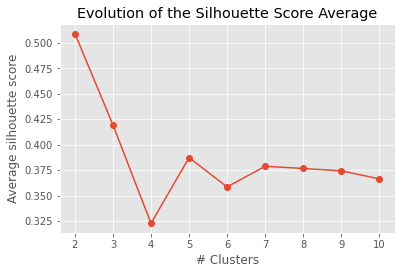

In [ ]:
# Silhouette Method:
range_n_clusters = range(2, 10+1)
avg_silhouette = []
X = projected;

for n_clusters in range_n_clusters:
    print(f'-- calculating silhouette score for {n_clusters} clusters')
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'complete',
                    n_clusters = n_clusters)

    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    avg_silhouette.append(silhouette_avg)


bNClus = np.array(list(range_n_clusters));

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(bNClus, avg_silhouette, marker='o')
ax.set_title("Evolution of the Silhouette Score Average")
ax.set_xlabel('# Clusters')
ax.set_ylabel('Average silhouette score');



In [ ]:
sel = avg_silhouette == max(avg_silhouette);
n_clus = bNClus[sel][0];
print(f'The optimum number of clusters is {n_clus}');

The optimum number of clusters is 2


In [ ]:
modelo_hclust_complete = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'complete',
                            n_clusters         = n_clus,
                            compute_distances = True);
modelo_hclust_complete.fit(X = X);

modelo_hclust_average = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'average',
                            n_clusters         = n_clus,
                            compute_distances = True);
modelo_hclust_average.fit(X = X);

modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            n_clusters = n_clus,
                            compute_distances = True);
modelo_hclust_ward.fit(X = X);

In [ ]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts information from an AgglomerativeClustering model and 
    represents its dendrogram with the function
    dendogram from scipy.cluster.hierarchy
    '''
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    d = dendrogram(linkage_matrix, truncate_mode = 'level', p = 5, **kwargs) #display only 5 levels
    return d

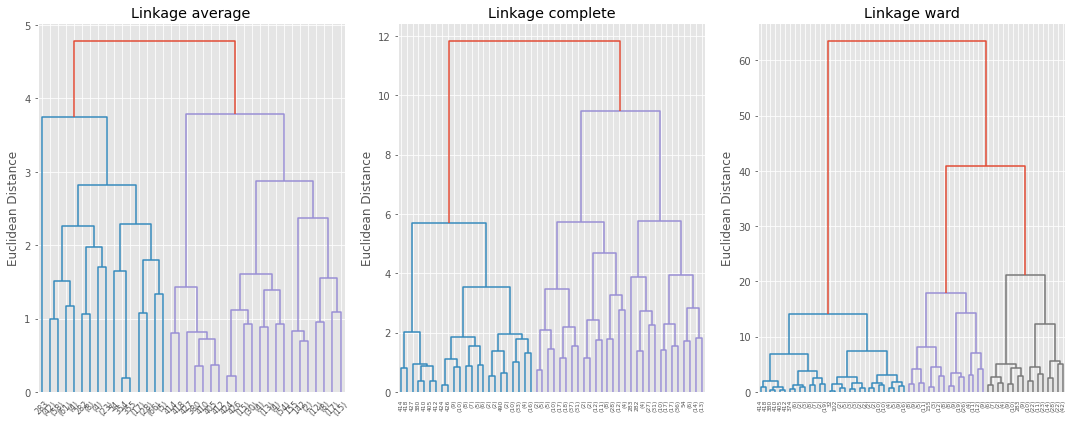

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
plot_dendrogram(modelo_hclust_average, color_threshold = 4, ax = ax[0])
ax[0].set_title("Linkage average")
ax[0].set_ylabel('Euclidean Distance');

plot_dendrogram(modelo_hclust_complete, color_threshold = 10, ax =ax[1])
ax[1].set_title("Linkage complete")
ax[1].set_ylabel('Euclidean Distance');

plot_dendrogram(modelo_hclust_ward, color_threshold = 40, ax = ax[2])
ax[2].set_title("Linkage ward")
ax[2].set_ylabel('Euclidean Distance');
plt.tight_layout();
plt.show()

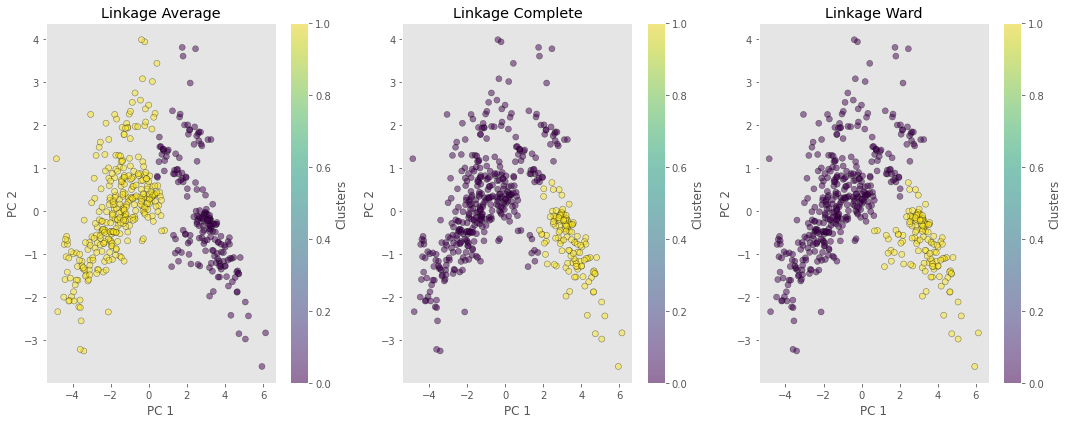

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

y_pred = modelo_hclust_average.labels_;
im = ax[0].scatter(X[:, 0], X[:, 1], c=y_pred, edgecolor='black', alpha=0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[0].grid()
ax[0].set_title('Linkage Average');
fig.colorbar(im, ax=ax[0], label = 'Clusters');

y_pred = modelo_hclust_complete.labels_;
im = ax[1].scatter(X[:, 0], X[:, 1], c=y_pred, edgecolor='black', alpha=0.5)
ax[1].set_xlabel('PC 1')
ax[1].set_ylabel('PC 2')
ax[1].grid()
ax[1].set_title('Linkage Complete');
fig.colorbar(im, ax=ax[1], label = 'Clusters');

y_pred = modelo_hclust_ward.labels_;
im = ax[2].scatter(X[:, 0], X[:, 1], c=y_pred, edgecolor='black', alpha=0.5)
ax[2].set_xlabel('PC 1')
ax[2].set_ylabel('PC 2')
ax[2].grid()
ax[2].set_title('Linkage Ward');
fig.colorbar(im, ax=ax[2], label = 'Clusters');

plt.tight_layout();
plt.show()


It seems like the Linkage complete offers the best clustering method, so we will go with that one:

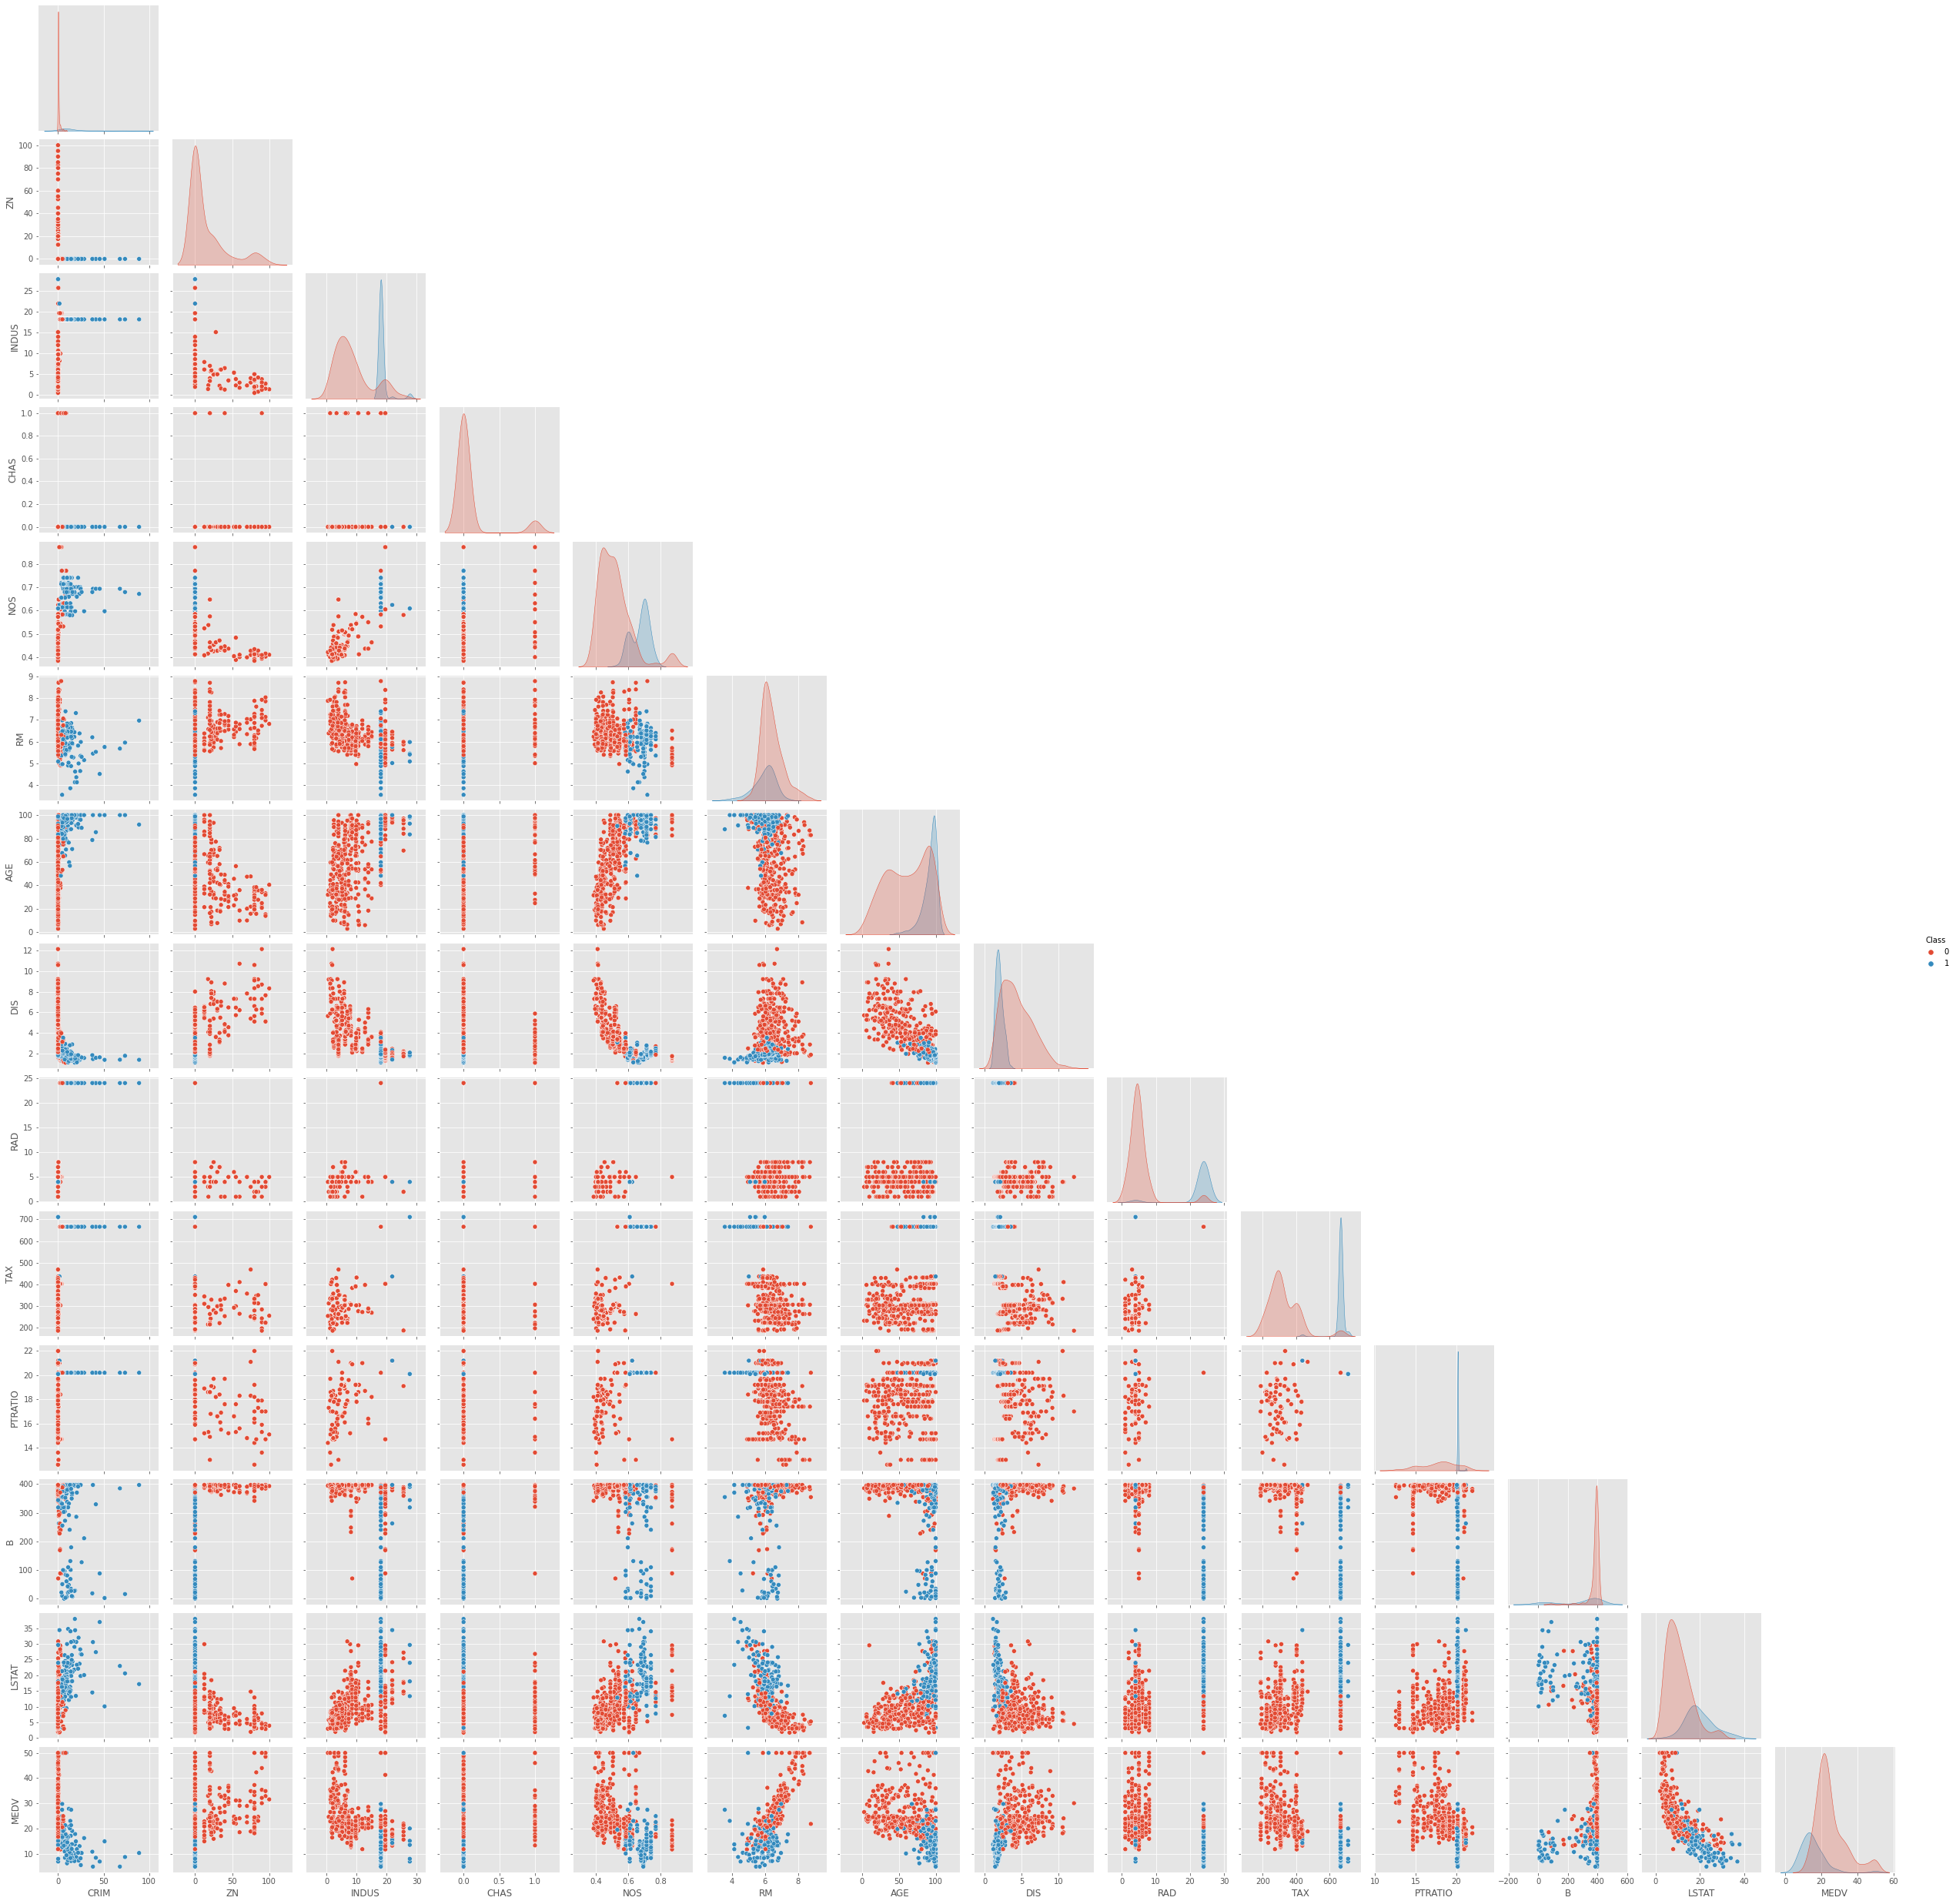

In [ ]:
#Describe all the possible interactions between the features:
y_pred = modelo_hclust_complete.labels_;
df["Class"] = y_pred;
g = sns.pairplot(data = df, corner = True, hue = 'Class', diag_kind='kde', dropna=True);

Although there seems to be 2 main clusters in the data, the price of the properties does not overlap perfectly on a particlar cluster. In this sense, we will estimate the value of the properties using 3 different methods over the reduced dataset:

1.   Regresión Lineal
2.   Regresión Lineal-Lasso
3.   Gradient Boosting


In [ ]:
#The price of the properties is the class to identify:

y = df.MEDV;

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create empty lists to store the results and models
lr_mse, lr_rmse, lr_r2 = [], [], []
Llr_mse, Llr_rmse, Llr_r2 = [], [], []
GB_mse, GB_rmse, GB_r2 = [], [], []
LR, LLR, GB = {}, {}, {}

# Define the number of cross-validation folds and iterations
num_folds = 5
num_iter = 20

# Set up the KFold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True)

for i in range(num_iter):
    mse1, rmse1, r21 = [], [], []
    mse2, rmse2, r22 = [], [], []
    mse3, rmse3, r23 = [], [], []

    # Split the data into training and testing sets for each fold
    for k, (train_index, test_index) in enumerate(kf.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the linear regression model and calculate metrics
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_pred1 = lr.predict(X_test)
        mse1.append(mean_squared_error(y_test, y_pred1))
        rmse1.append(np.sqrt(mse1[k]))
        r21.append(r2_score(y_test, y_pred1))

        # Fit the Lasso regression model and calculate metrics
        param_grid = {'alpha': [1.0, 0.8, 0.5, 0.3, 0.1]}
        Llr = Lasso()
        Llr_cv = GridSearchCV(Llr, param_grid, scoring='neg_mean_squared_error')
        Llr_cv.fit(X_train, y_train)
        Llr.set_params(**Llr_cv.best_params_)
        Llr.fit(X_train, y_train)
        y_pred2 = Llr.predict(X_test)
        mse2.append(mean_squared_error(y_test, y_pred2))
        rmse2.append(np.sqrt(mse2[k]))
        r22.append(r2_score(y_test, y_pred2))

        # Fit the Gradient Boosting regression model and calculate metrics
        gb = GradientBoostingRegressor(n_estimators=300, max_depth=6, max_features=2, learning_rate=0.1)
        gb.fit(X_train, y_train)
        y_pred3 = gb.predict(X_test)
        mse3.append(mean_squared_error(y_test, y_pred3))
        rmse3.append(np.sqrt(mse3[k]))
        r23.append(r2_score(y_test, y_pred3))

    # Store the average metrics for each model
    lr_mse.append(np.mean(mse1))
    lr_rmse.append(np.mean(rmse1))
    lr_r2.append(np.mean(r21))
    Llr_mse.append(np.mean(mse2))
    Llr_rmse.append(np.mean(rmse2))
    Llr_r2.append(np.mean(r22))
    GB_mse.append(np.mean(mse3))
    GB_rmse.append(np.mean(rmse3))
    GB_r2.append(np.mean(r23))

    # Store the result of the model for each iteration
    LR[i] = lr
    LLR[i] = Llr
    GB[i] = gb

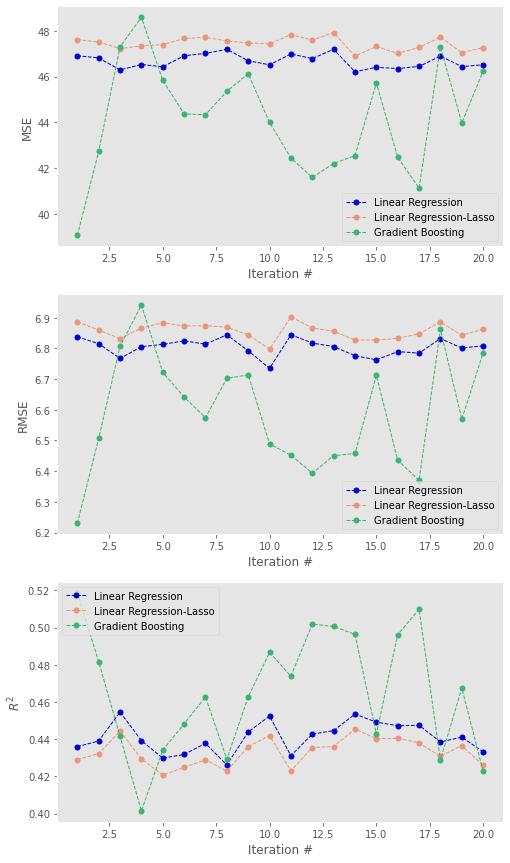

In [ ]:
fig,ax = plt.subplots(3,1,figsize = (8,15));

labels = ['Linear Regression', 'Linear Regression-Lasso', 'Gradient Boosting'];

iteration = range(1,21);
ax[0].plot(iteration,lr_mse,color="mediumblue",label= labels[0],marker='o', linestyle='dashed',linewidth=1, markersize=5)
ax[0].plot(iteration,Llr_mse,color="darksalmon",label= labels[1],marker='o', linestyle='dashed',linewidth=1, markersize=5)
ax[0].plot(iteration,GB_mse,color="mediumseagreen",label= labels[2],marker='o', linestyle='dashed',linewidth=1, markersize=5)
ax[0].set_ylabel("MSE")
ax[0].set_xlabel("Iteration #")
ax[0].legend()
ax[0].grid()

ax[1].plot(iteration,lr_rmse,color="mediumblue",label=labels[0],marker='o', linestyle='dashed',linewidth=1, markersize=5)
ax[1].plot(iteration,Llr_rmse,color="darksalmon",label=labels[1],marker='o', linestyle='dashed',linewidth=1, markersize=5)
ax[1].plot(iteration,GB_rmse,color="mediumseagreen",label=labels[2],marker='o', linestyle='dashed',linewidth=1, markersize=5)
ax[1].set_ylabel("RMSE")
ax[1].set_xlabel("Iteration #")
ax[1].legend()
ax[1].grid()

ax[2].plot(iteration,lr_r2,color="mediumblue",label=labels[0],marker='o', linestyle='dashed',linewidth=1, markersize=5)
ax[2].plot(iteration,Llr_r2,color="darksalmon",label=labels[1],marker='o', linestyle='dashed',linewidth=1, markersize=5)
ax[2].plot(iteration,GB_r2,color="mediumseagreen",label=labels[2],marker='o', linestyle='dashed',linewidth=1, markersize=5)
ax[2].set_ylabel("$R^2$")
ax[2].set_xlabel("Iteration #")
ax[2].legend()
ax[2].grid()


plt.show()

from : [Article about MSE, RMSE and R2](https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e)

Differences among these evaluation metrics
Mean Squared Error(MSE) and Root Mean Square Error penalizes the large prediction errors vi-a-vis Mean Absolute Error (MAE). However, RMSE is widely used than MSE to evaluate the performance of the regression model with other random models as it has the same units as the dependent variable (Y-axis).
MSE is a differentiable function that makes it easy to perform mathematical operations in comparison to a non-differentiable function like MAE. Therefore, in many models, RMSE is used as a default metric for calculating Loss Function despite being harder to interpret than MAE.
**The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable.**
R Squared & Adjusted R Squared are used for explaining how well the independent variables in the linear regression model explains the variability in the dependent variable. R Squared value always increases with the addition of the independent variables which might lead to the addition of the redundant variables in our model. However, the adjusted R-squared solves this problem.

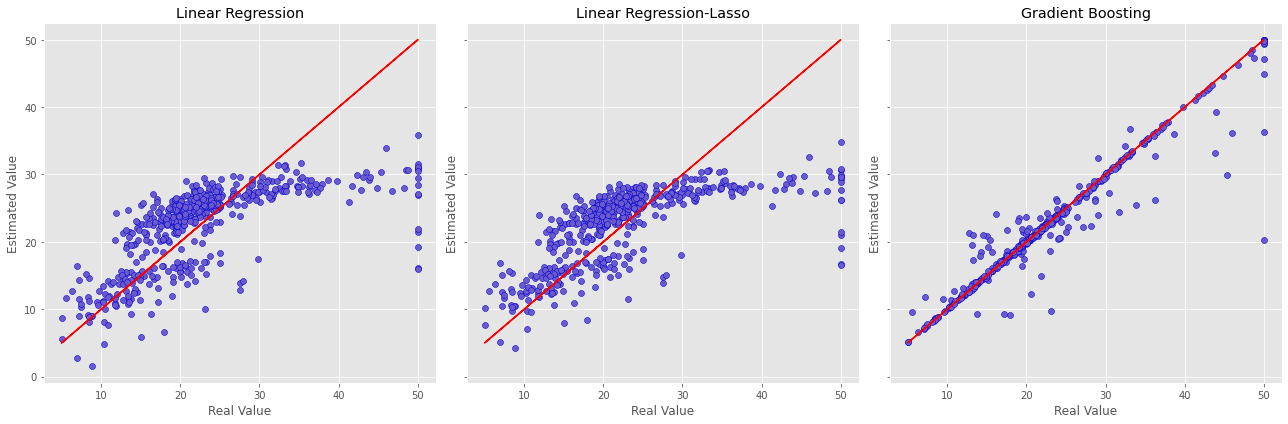

In [ ]:
#chosen iterations (the highest R2):
lr=LR[np.argmax(lr_r2)]
Llr=LLR[np.argmax(Llr_r2)]
gb=GB[np.argmax(GB_r2)]

#predict prices with the models:
y_pred1=lr.predict(X)
y_pred2=Llr.predict(X)
y_pred3=gb.predict(X)

#Plot estimation:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey = True)

ax[0].scatter(y,y_pred1,color="slateblue",edgecolor="mediumblue")
ax[0].plot(y,y, 'r')
ax[0].set_xlabel('Real Value')
ax[0].set_ylabel('Estimated Value')
ax[0].set_title('Linear Regression')
ax[0].grid(True)

ax[1].scatter(y,y_pred2,color="slateblue",edgecolor="mediumblue")
ax[1].plot(y,y,color="red")
ax[1].set_xlabel('Real Value')
ax[1].set_ylabel('Estimated Value')
ax[1].set_title('Linear Regression-Lasso')
ax[1].grid(True)
    

ax[2].scatter(y,y_pred3,color="slateblue",edgecolor="mediumblue")
ax[2].plot(y,y,color="red")
ax[2].set_xlabel('Real Value')
ax[2].set_ylabel('Estimated Value')
ax[2].set_title('Gradient Boosting');
ax[2].grid(True)

plt.tight_layout()
plt.show();

The closer the values are to the red line, the more accurate the estimation is, and therefore the better the model is too. In this case, there the Linear regression methods did a modest job with the lowest accuracy for the high prices. However, the Gradient Boosting method showed the best performance.

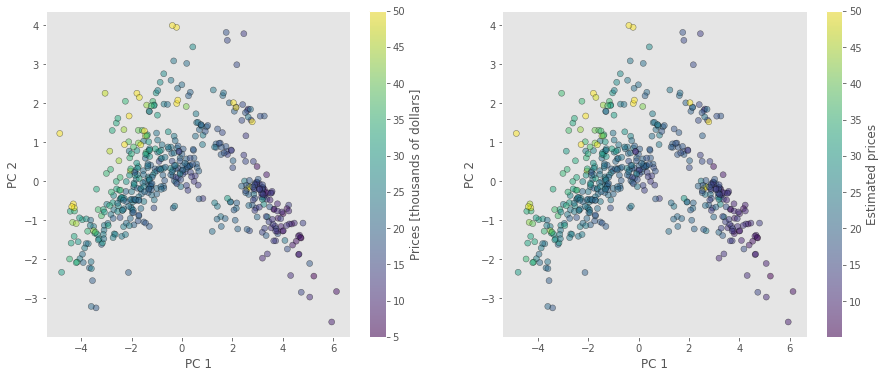

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
im = ax[0].scatter(X[:, 0], X[:, 1], c=y, edgecolor='black', alpha=0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[0].grid()
fig.colorbar(im, ax=ax[0], label = 'Prices [thousands of dollars]')

im = ax[1].scatter(X[:, 0], X[:, 1], c=y_pred3, edgecolor='black', alpha=0.5)
ax[1].set_xlabel('PC 1')
ax[1].set_ylabel('PC 2')
ax[1].grid()
fig.colorbar(im, ax=ax[1], label = 'Estimated prices')

plt.show()